# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
# Write your code here
#change the word matching with regex!

import pandas as pd
import pprint
from google.colab import drive
import nltk
from textblob import TextBlob
import time

from collections import Counter

nltk.download('punkt')
nltk.download('brown')

drive.mount('drive', force_remount=True)
dataframe = pd.read_csv('/content/drive/My Drive/densho_11700380_cleaned.csv')

def unique_value(ngram_list):
  unique_value = []

  for _list in ngram_list:
    if _list not in unique_value:
        unique_value.append(_list)

  return unique_value

def generate_ngrams(text, n, delimiter="_"):
  #assume we are working with a clean data
  result = []
  #if type(text) is not str:
  #  text = ""
  tokens = text.split(" ")

  for i in range(len(tokens)):
    #check the index
    if i+n <= len(tokens):
      #create ngrams
      word = ""
      for j in range(n):
        word += delimiter + tokens[i+j]
      result.append(word[1:])
      word = ""
    else: break

  return result

def count_ngram_frequency(ngram_list):
  result = {}

  unique_ = []
  unique_ = unique_value(ngram_list)

  for value in unique_:
    counter = 0
    for i in ngram_list:
      if value == i: counter += 1
      else: continue
    result.update({value: counter})

  return result

def np_list(text):
  np = TextBlob(text)
  return np.noun_phrases

#no correction for know
def correction(text):
  cor = TextBlob(text)
  return cor.correct()

def count_ngram_probability(ngram_list_numerator, ngram_list_denominator):
  result = {}

  ngram_numerator_freq = count_ngram_frequency(ngram_list_numerator)
  ngram_denominator_freq = count_ngram_frequency(ngram_list_denominator)

  #count(w2 w1) / count(w2)
  for k, v in ngram_numerator_freq.items():
    #get the first word
    first_word = k.split(" ")[0]
    if first_word in ngram_denominator_freq:
      result.update({k: float(v/ngram_denominator_freq[first_word])})

  return result

def count_np_probability(np_list):
  np_dict = {}
  max_np = len(np_list)
  unique_np_freq = count_ngram_frequency(np_list)

  for k, v in unique_np_freq.items():
    #frequency (noun phrase) / max frequency (noun phrase)
    np_dict.update({k: float(v/max_np)})

  return np_dict

#preprocess
#remove duplicate values
dataframe = dataframe.drop_duplicates(subset=['desc'])

#remove nan value
dataframe = dataframe.dropna()
df_len = len(dataframe.index)

unigram = []
bigram = []
trigram = []
np = []

print("\nCreating N-Grams...\n")
t = time.process_time()
for index, row in dataframe.iterrows():
  text = row['desc']
  unigram.extend(generate_ngrams(text, 1, delimiter=" "))
  bigram.extend(generate_ngrams(text, 2, delimiter=" "))
  trigram.extend(generate_ngrams(text, 3, delimiter=" "))
  np.extend(np_list(text))

print("\nDone...\nProcess time..."+str(time.process_time() - t)+" seconds\n")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


Mounted at drive

Creating N-Grams...


Done...
Process time...2.691205355999955 seconds



In [ ]:
#1)Trigrams frequency
t2 = time.process_time()
print("TRIGRAMS FREQUENCY\n")
print("Calculating...\n")

dataframe_trigram = pd.DataFrame(columns=["trigram", "frequency"])

index = 1
for k_trigram, v_trigram in count_ngram_frequency(trigram).items():
  dataframe_trigram.loc[index] = [k_trigram, v_trigram]
  index += 1

display(dataframe_trigram)

print("\nDone...\nProcess time..."+str(time.process_time() - t2)+" seconds\n")

TRIGRAMS FREQUENCY

Calculating...



,trigram,frequency
1,kay aiko abe,1
2,aiko abe nisei,1
3,abe nisei femal,1
4,nisei femal born,286
5,femal born may,32
...,...,...
29823,began work offic,1
29824,work offic inspector,1
29825,inspector gener u,1
29826,gener u s,1



Done...
Process time...226.77490375900015 seconds

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


from matplotlib import pyplot as plt
dataframe_trigram['frequency'].plot(kind='hist', bins=20, title='frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dataframe_trigram['frequency'].plot(kind='line', figsize=(8, 4), title='frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
#2)Bigrams probability
t3 = time.process_time()
print("\nBIGRAMS PROBABILITY\n")
print("Calculating...\n")

dataframe_bigram = pd.DataFrame(columns=["bigram", "probability"])

index = 1
for k_bigram, v_bigram in count_ngram_probability(bigram, unigram).items():
  dataframe_bigram.loc[index] = [k_bigram, v_bigram]
  index += 1

display(dataframe_bigram)

print("\nDone...\nProcess time..."+str(time.process_time() - t3)+" seconds\n")


BIGRAMS PROBABILITY

Calculating...



,bigram,probability
1,kay aiko,0.090909
2,aiko abe,0.200000
3,abe nisei,1.000000
4,nisei femal,0.397590
5,femal born,0.938119
...,...,...
21365,februari in,0.014085
21366,februari left,0.014085
21367,left civil,0.008929
21368,divis began,0.066667



Done...
Process time...158.60955475799983 seconds



In [ ]:
#3) Noun phrase probability
t4 = time.process_time()
print("NOUN PHRASE PROBABILITY\n")
print("Calculating...\n")

dataframe_np = pd.DataFrame(columns=["noun phrase", "probability"])

index = 1
for k_np, v_np in count_np_probability(np).items():
  dataframe_np.loc[index] = [k_np, v_np]
  index += 1

display(dataframe_np)

print("\nDone...\nProcess time..."+str(time.process_time() - t4)+" seconds\n")

NOUN PHRASE PROBABILITY

Calculating...



,noun phrase,probability
1,kay aiko abe nisei femal,0.000144
2,selleck washington,0.000144
3,childhood beaverton oregon father,0.000144
4,own farm influenc earli age parent convers chr...,0.000144
5,war work,0.000144
...,...,...
5947,civil right investig provid litig support,0.000144
5948,need litig support,0.000144
5949,amount work requir os decreas mani staff membe...,0.000144
5950,civil right divis mr zajic continu work litig ...,0.000144



Done...
Process time...8.715061833000163 seconds



from matplotlib import pyplot as plt
dataframe_np['probability'].plot(kind='hist', bins=20, title='probability')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dataframe_np['probability'].plot(kind='line', figsize=(8, 4), title='probability')
plt.gca().spines[['top', 'right']].set_visible(False)

## Question 2 (25 points)

**Understand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
# Write your code here

import pandas as pd
import pprint
from google.colab import drive
import math
import re

def unique_value(ngram_list):
  unique_value = []

  for _list in ngram_list:
    if _list not in unique_value:
        unique_value.append(_list)

  return unique_value

def generate_ngrams(text, n, delimiter="_"):
  #assume we are working with a clean data
  result = []
  #if type(text) is not str:
  #  text = ""
  tokens = text.split(" ")

  for i in range(len(tokens)):
    #check the index
    if i+n <= len(tokens):
      #create ngrams
      word = ""
      for j in range(n):
        word += delimiter + tokens[i+j]
      result.append(word[1:])
      word = ""
    else: break

  return result

def tfidf(words, documents):
  #TF(word, document) = “number of occurrences of the word in the document” / “number of words in the document”
  #IDF =Log[(# Number of documents) / (Number of documents containing the word)]
  tfidf = []
  docidf_len = len(documents.index)

  #generate TF values
  #unique words
  for word in words:
    #iterate through the documents
    document_word_n = 1 #set 1 to prevent division by 0
    #reset/initialize tf value
    tf_value = []
    for doc_key, doc_value in documents.iterrows():
      doc = doc_value['desc']

      #word occurence
      w = doc.split()

      word_n = w.count(word)
      doc_len = len(doc.split())

      #document counter for idf
      if word_n != 0:
        document_word_n += 1

      tf_value.append([word, doc_key, float(word_n/doc_len)])

    #insert idf here
    for i, n in enumerate(tf_value):
      tf_value[i][2] = tf_value[i][2] * float(math.log10(docidf_len/document_word_n))

    tfidf.append(tf_value)

  tfidf_dataframe = pd.DataFrame(tfidf)
  return tfidf_dataframe



In [ ]:
drive.mount('drive', force_remount=True)
dataframe = pd.read_csv('/content/drive/My Drive/densho_11700380_cleaned.csv')

#preprocess
#remove duplicate values
dataframe = dataframe.drop_duplicates(subset=['desc'])

#remove nan value
dataframe = dataframe.dropna()
unigram = []

for index, row in dataframe.iterrows():
  #remove short strings
  dataframe.at[index, 'desc'] = " ".join(word for word in row['desc'].split() if len(word) > 2)
  #create the unique words list
  unigram.extend(generate_ngrams(dataframe.loc[index, 'desc'], 1, delimiter=" "))

#1) documents-terms weights (tf * idf) matrix
print("TF-IDF MATRIX\n")
unique_words = unique_value(unigram)

tfidx_dataframe = tfidf(unique_words, dataframe)
display(tfidx_dataframe)



Mounted at drive
TF-IDF MATRIX



,0,1,2,3,4,5,6,7,8,9,...,963,964,965,966,967,968,969,970,971,972
0,"[kay, 0, 0.04232000337195928]","[kay, 1, 0.0]","[kay, 2, 0.0]","[kay, 3, 0.0]","[kay, 4, 0.0]","[kay, 5, 0.0]","[kay, 6, 0.0]","[kay, 7, 0.0]","[kay, 8, 0.0]","[kay, 9, 0.0]",...,"[kay, 967, 0.0]","[kay, 968, 0.0]","[kay, 969, 0.0]","[kay, 970, 0.0]","[kay, 971, 0.0]","[kay, 972, 0.0]","[kay, 973, 0.0]","[kay, 974, 0.0]","[kay, 975, 0.0]","[kay, 976, 0.0]"
1,"[aiko, 0, 0.04976397469418115]","[aiko, 1, 0.0]","[aiko, 2, 0.0]","[aiko, 3, 0.0]","[aiko, 4, 0.0]","[aiko, 5, 0.0]","[aiko, 6, 0.0]","[aiko, 7, 0.0]","[aiko, 8, 0.0]","[aiko, 9, 0.0]",...,"[aiko, 967, 0.0]","[aiko, 968, 0.0]","[aiko, 969, 0.0]","[aiko, 970, 0.0]","[aiko, 971, 0.0]","[aiko, 972, 0.0]","[aiko, 973, 0.0]","[aiko, 974, 0.0]","[aiko, 975, 0.0]","[aiko, 976, 0.0]"
2,"[abe, 0, 0.05458677359888455]","[abe, 1, 0.03587130836498127]","[abe, 2, 0.0]","[abe, 3, 0.0]","[abe, 4, 0.0]","[abe, 5, 0.0]","[abe, 6, 0.0]","[abe, 7, 0.0]","[abe, 8, 0.0]","[abe, 9, 0.0]",...,"[abe, 967, 0.0]","[abe, 968, 0.0]","[abe, 969, 0.0]","[abe, 970, 0.0]","[abe, 971, 0.0]","[abe, 972, 0.0]","[abe, 973, 0.0]","[abe, 974, 0.0]","[abe, 975, 0.0]","[abe, 976, 0.0]"
3,"[nisei, 0, 0.0028693129570880774]","[nisei, 1, 0.0037710970293157588]","[nisei, 2, 0.002749758250542741]","[nisei, 3, 0.002749758250542741]","[nisei, 4, 0.0]","[nisei, 5, 0.0016294863706919945]","[nisei, 6, 0.0]","[nisei, 7, 0.0028082637452351393]","[nisei, 8, 0.001714135013325345]","[nisei, 9, 0.0022370914580686703]",...,"[nisei, 967, 0.002588007765216697]","[nisei, 968, 0.0032997099006512893]","[nisei, 969, 0.003069497582001199]","[nisei, 970, 0.0029997362733193535]","[nisei, 971, 0.0028693129570880774]","[nisei, 972, 0.0]","[nisei, 973, 0.0]","[nisei, 974, 0.0]","[nisei, 975, 0.0052795358410420625]","[nisei, 976, 0.0]"
4,"[femal, 0, 0.00827516993594964]","[femal, 1, 0.0]","[femal, 2, 0.007930371188618404]","[femal, 3, 0.007930371188618404]","[femal, 4, 0.0]","[femal, 5, 0.00469947922288498]","[femal, 6, 0.0]","[femal, 7, 0.0]","[femal, 8, 0.0]","[femal, 9, 0.0]",...,"[femal, 967, 0.0]","[femal, 968, 0.009516445426342085]","[femal, 969, 0.008852507373341475]","[femal, 970, 0.0]","[femal, 971, 0.0]","[femal, 972, 0.008852507373341475]","[femal, 973, 0.0]","[femal, 974, 0.0346052560957894]","[femal, 975, 0.015226312682147336]","[femal, 976, 0.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4549,"[zajic, 0, 0.0]","[zajic, 1, 0.0]","[zajic, 2, 0.0]","[zajic, 3, 0.0]","[zajic, 4, 0.0]","[zajic, 5, 0.0]","[zajic, 6, 0.0]","[zajic, 7, 0.0]","[zajic, 8, 0.0]","[zajic, 9, 0.0]",...,"[zajic, 967, 0.0]","[zajic, 968, 0.0]","[zajic, 969, 0.0]","[zajic, 970, 0.0]","[zajic, 971, 0.0]","[zajic, 972, 0.0]","[zajic, 973, 0.0]","[zajic, 974, 0.0]","[zajic, 975, 0.0]","[zajic, 976, 0.06322547869657343]"
4550,"[amount, 0, 0.0]","[amount, 1, 0.0]","[amount, 2, 0.0]","[amount, 3, 0.0]","[amount, 4, 0.0]","[amount, 5, 0.0]","[amount, 6, 0.0]","[amount, 7, 0.0]","[amount, 8, 0.0]","[amount, 9, 0.0]",...,"[amount, 967, 0.0]","[amount, 968, 0.0]","[amount, 969, 0.0]","[amount, 970, 0.0]","[amount, 971, 0.0]","[amount, 972, 0.0]","[amount, 973, 0.0]","[amount, 974, 0.0]","[amount, 975, 0.0]","[amount, 976, 0.03161273934828671]"
4551,"[decreas, 0, 0.0]","[decreas, 1, 0.0]","[decreas, 2, 0.0]","[decreas, 3, 0.0]","[decreas, 4, 0.0]","[decreas, 5, 0.0]","[decreas, 6, 0.0]","[decreas, 7, 0.0]","[decreas, 8, 0.0]","[decreas, 9, 0.0]",...,"[decreas, 967, 0.0]","[decreas, 968, 0.0]","[decreas, 969, 0.0]","[decreas, 970, 0.0]","[decreas, 971, 0.0]","[decreas, 972, 0.0]","[decreas, 973, 0.0]","[decreas, 974, 0.0]","[decreas, 975, 0.0]","[decreas, 976, 0.03161273934828671]"
4552,"[kind, 0, 0.0]","[kind, 1, 0.0]","[kind, 2, 0.0]","[kind, 3, 0.0]","[kind, 4, 0.0]","[kind, 5, 0.0]","[kind, 6, 0.0]","[kind, 7, 0.0]","[kind, 8, 0.0]","[kind, 9, 0.0]",...,"[kind, 967, 0.0]","[kind, 968, 0.0]","[kind, 969, 0.0]","[kind, 970, 0.0]","[kind, 971, 0.0]","[kind, 

In [ ]:
#cosine similarity

from nltk.corpus import stopwords
import nltk
import string
import re
import pandas as pd
import math
import pprint

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

#preprocess the query
def preprocess(query):
  query = re.sub("[^A-Za-z]+"," ", query)
  query = re.sub("[0-9]+"," ", query)

  stop = stopwords.words('english')
  query = " ".join(query for query in query.split() if query not in stop)
  query = query.lower()

  from nltk.stem import PorterStemmer
  st = PorterStemmer()
  query = " ".join([st.stem(query) for query in query.split()])


  from textblob import Word
  query = " ".join([Word(query).lemmatize() for query in query.split()])

  return query.split()

def cosine_similarity(query, documents):
  #reference https://janav.wordpress.com/2013/10/27/tf-idf-and-cosine-similarity/
  docs_similarity = {}

  for doc_key, doc_value in documents.items():
    dot_product = 0
    magnitude_q = 0
    magnitude_d = 0

    for q_key, q_value in query.iterrows():
      #dot product query & document
      dot_product += float(query.iat[q_key,q_key][2]) * float(doc_value[q_key][2])
      magnitude_q += float(query.iat[q_key,q_key][2]) * float(query.iat[q_key,q_key][2])
      magnitude_d += float(doc_value[q_key][2]) * float(doc_value[q_key][2])

    docs_similarity.update({"Doc" + str(doc_key + 1): float(dot_product/math.sqrt(magnitude_q) * math.sqrt(magnitude_d))})

  return docs_similarity

while True:
  #sample query
  #Following the war, she worked diligently to establish an effective volunteer program aimed at providing meals for the homeless in Seattle, Washington.
  #attack on Pearl Harbor
  #Because of the father’s role as a notable Navy admiral, the family relocated often during their upbringing, residing in Hawaii, Cuba, California, China, and Japan.
  #The mischievous squirrel donned a tiny top hat and tap-danced across the garden fence
  #Indonesia, with its diverse archipelago and vibrant culture, captivates visitors with its breathtaking landscapes and warm hospitality.

  query = input("\nInput your query (type 'quit' to exit):")

  if query.lower() == "quit":
    break
  elif query == "":
    continue
  else:
    query = preprocess(query)
    query = unique_value(query)

    #tfidx of the query
    tfidx_query = tfidf(query, pd.DataFrame(columns=["desc"], data=query))

    #tfidx of the query and documents
    tfidx_query_doc = tfidf(query, dataframe)

    similarity = cosine_similarity(tfidx_query, tfidx_query_doc)

    #remove 0.0 values
    similarity = {key:val for key, val in similarity.items() if val != 0.0}

    #sorting and get top 20 documents match
    similarity = sorted(similarity.items(), key=lambda item:item[1], reverse=True)[:20]

    for sim in similarity:
      #get document id
      doc_id = int(sim[0][3:])
      document_value = dataframe.iat[doc_id-1, 3]

      print("Cosine Similarity value:{} - {}".format(str(sim[1]), str(document_value)))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Input your query (type 'quit' to exit):

Input your query (type 'quit' to exit):Because of the father’s role as a notable Navy admiral, the family relocated often during their upbringing, residing in Hawaii, Cuba, California, China, and Japan
Cosine Similarity value:0.015711931574225835 - maynard horiuchi femal born august vallejo california due father career promin navi admir move frequent grow live hawaii cuba california china japan work editor militari washington japan while japan met futur husband luciu horiuchi
Cosine Similarity value:0.003957060964880373 - genro kashiwa nisei male born april waialua hawaii grew hawaii father buddhist priest dure world war serv regiment combat team franc itali after war went law school eventu return hawaii
Cosine Similarity value:0.0039017479780676908 - paul yempuku kibei male born januari kahuku hawaii move japan famili age six attend school japan work naval base japan world war take part air raid bomb forc attend colleg japan return hawaii war 

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

Mounted at drive
Word2Vec<vocab=2588, vector_size=100, alpha=0.025>


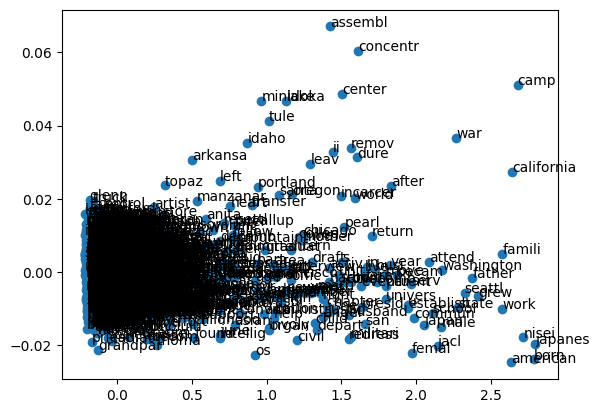

In [ ]:
# Write your code here

import pandas as pd
import pprint
from google.colab import drive
import math
import re
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

drive.mount('drive', force_remount=True)
dataframe = pd.read_csv('/content/drive/My Drive/densho_11700380_cleaned.csv')

sentences = []
# define training data
for i in range(300):
  sentences.append(str(dataframe.iloc[i]['desc']).split(" "))

# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.key_to_index)

x = model.wv[words]
pca = PCA(n_components=2)
result = pca.fit_transform(x)

pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()








## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link:
'''
https://github.com/kahosadi/INFO5731_Spring_2024/blob/main/densho_cleaned_annotated.csv
'''


# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer
'''
Challenging part: coding
Best part: coding

I won't complain. But I was doing other assignments simultaneously; to make things worse, this is tax season.
If I had more time, I would do it better.